In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(['CustomerID'],axis=1,inplace=True) # We dont need Customer ID

In [6]:
df.columns=['Gender','Age','Annual_Income','Spending_Score'] #change the names of the columns

In [7]:
# Convert gender to 1 and 0
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


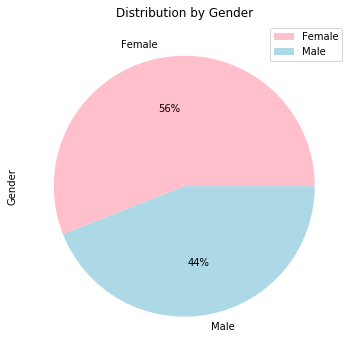

In [8]:
list_gen=df['Gender'].value_counts()
list_gen.plot.pie(figsize=(6, 6), legend=True,autopct='%1.0f%%',labels=['Female','Male'],colors=['pink','lightblue'])
plt.title('Distribution by Gender')
plt.show()

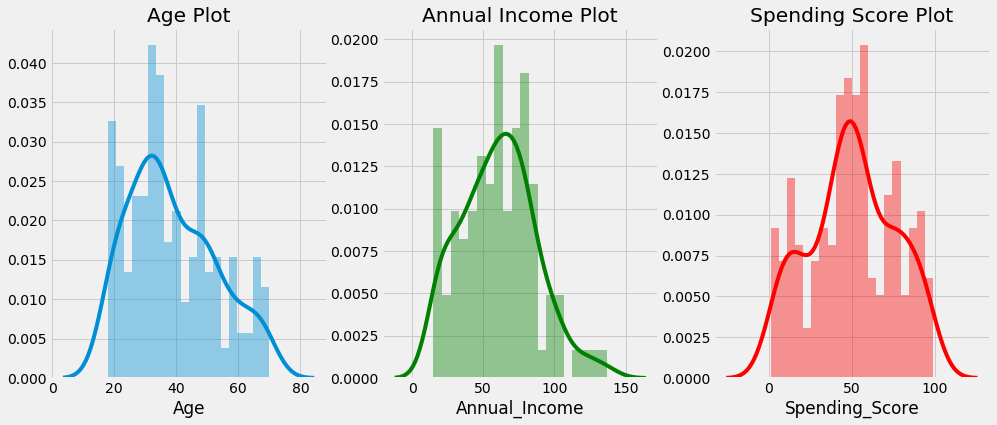

In [9]:
plt.style.use('fivethirtyeight')
AgePlot = df['Age'].value_counts()
IncomePlot = df['Annual_Income'].value_counts().sort_values()
ScorePlot = df['Spending_Score'].value_counts().sort_values()
fig, axs = plt.subplots(1,3,figsize=(15, 6))
sns.distplot(df['Age'] , bins = 20, ax=axs[0])
axs[0].title.set_text('Age Plot')
sns.distplot(df['Annual_Income'] , bins = 20,color='g',ax=axs[1])
axs[1].title.set_text('Annual Income Plot')
sns.distplot(df['Spending_Score'] , bins = 20,color='r',ax=axs[2])
axs[2].title.set_text('Spending Score Plot')

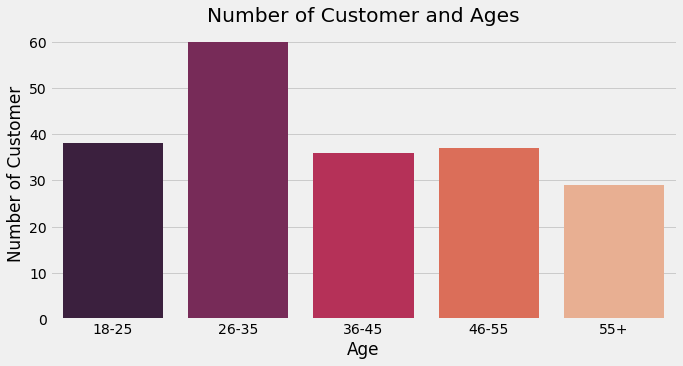

In [10]:
age18_25 = df[(df['Age'] <= 25) & (df['Age']>= 18)]['Age'].count()
age26_35 = df[(df['Age'] <= 35) & (df['Age']>= 26)]['Age'].count()
age36_45 = df[(df['Age'] <= 45) & (df['Age']>= 36)]['Age'].count()
age46_55 = df[(df['Age'] <= 55) & (df['Age']>= 46)]['Age'].count()
age55above =df[df['Age']>= 56]['Age'].count()
x = '18-25 26-35 36-45 46-55 55+'.split()
y = (age18_25, age26_35, age36_45 ,age46_55 ,age55above)
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()